K-NN using real data:
Fold 1 - Accuracy: 0.6591
Classification Report for Fold 1:
              precision    recall  f1-score   support

         BIG       0.59      0.93      0.72        14
        LONG       0.73      0.64      0.68        25
     MITOTIC       0.89      0.69      0.78        36
 RAR-TREATED       0.46      0.88      0.61        26
       ROUND       1.00      0.32      0.49        31

    accuracy                           0.66       132
   macro avg       0.73      0.69      0.66       132
weighted avg       0.77      0.66      0.65       132

Confusion Matrix for Fold 1:
[[13  0  0  1  0]
 [ 3 16  1  5  0]
 [ 2  3 25  6  0]
 [ 3  0  0 23  0]
 [ 1  3  2 15 10]]

Fold 2 - Accuracy: 0.6641
Classification Report for Fold 2:
              precision    recall  f1-score   support

         BIG       0.57      1.00      0.73        16
        LONG       0.65      0.52      0.58        21
     MITOTIC       1.00      0.87      0.93        38
 RAR-TREATED       0.42      0.

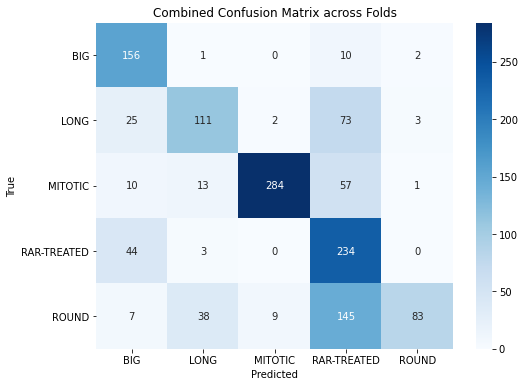


K-NN using synthetic data:
Fold 1 - Accuracy: 1.0000
Classification Report for Fold 1:
              precision    recall  f1-score   support

         BIG       1.00      1.00      1.00        46
        LONG       1.00      1.00      1.00        50
     MITOTIC       1.00      1.00      1.00        63
 RAR-TREATED       1.00      1.00      1.00        50
       ROUND       1.00      1.00      1.00        41

    accuracy                           1.00       250
   macro avg       1.00      1.00      1.00       250
weighted avg       1.00      1.00      1.00       250

Confusion Matrix for Fold 1:
[[46  0  0  0  0]
 [ 0 50  0  0  0]
 [ 0  0 63  0  0]
 [ 0  0  0 50  0]
 [ 0  0  0  0 41]]

Fold 2 - Accuracy: 1.0000
Classification Report for Fold 2:
              precision    recall  f1-score   support

         BIG       1.00      1.00      1.00        54
        LONG       1.00      1.00      1.00        38
     MITOTIC       1.00      1.00      1.00        45
 RAR-TREATED       1.00  

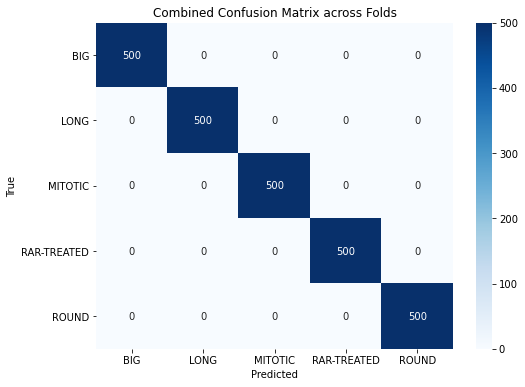


K-NN using synthetic as training data and real as testing data:
Fold 1 - Accuracy: 0.8691
Classification Report for Fold 1:
              precision    recall  f1-score   support

         BIG       0.90      1.00      0.95        81
        LONG       0.90      0.83      0.87        66
     MITOTIC       0.96      0.85      0.90        82
 RAR-TREATED       0.69      0.95      0.80        73
       ROUND       0.98      0.71      0.83        80

    accuracy                           0.87       382
   macro avg       0.89      0.87      0.87       382
weighted avg       0.89      0.87      0.87       382

Confusion Matrix for Fold 1:
[[81  0  0  0  0]
 [ 3 55  0  7  1]
 [ 2  2 70  8  0]
 [ 3  1  0 69  0]
 [ 1  3  3 16 57]]

Fold 2 - Accuracy: 0.8714
Classification Report for Fold 2:
              precision    recall  f1-score   support

         BIG       0.87      0.99      0.92        72
        LONG       0.92      0.87      0.89        68
     MITOTIC       0.99      0.88      0.9

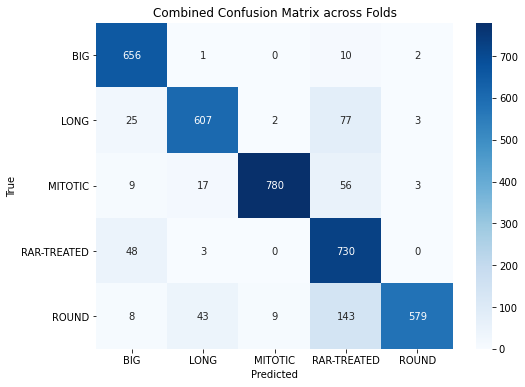

In [10]:
import os
import numpy as np
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from skimage.io import imread
from skimage.transform import resize
import matplotlib.pyplot as plt
import seaborn as sns

def load_images_and_labels(class_folders):
    images = []
    labels = []

    for class_label, class_folder in enumerate(class_folders, start=1):
        image_files = os.listdir(class_folder)

        for file in image_files:
            if file.lower().endswith(('.png', '.jpg', '.jpeg')):
                image = imread(os.path.join(class_folder, file))
                image = resize(image, (100, 100))

                images.append(image)
                labels.append(class_label)

    X = np.array(images)
    y = np.array(labels)

    X_flatten = X.reshape(X.shape[0], -1)

    return X_flatten, y

def evaluate_knn(X, y, k, class_names):
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance')
    kf = KFold(n_splits=10, shuffle=True, random_state=42)
    
    fold_accuracies = []
    fold_reports = []
    fold_matrices = []
    
    for fold_idx, (train_idx, test_idx) in enumerate(kf.split(X)):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]
        
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        
        fold_accuracy = accuracy_score(y_test, y_pred)
        fold_accuracies.append(fold_accuracy)
        
        fold_report = classification_report(y_test, y_pred, target_names=class_names)
        fold_reports.append(fold_report)
        
        fold_matrix = confusion_matrix(y_test, y_pred)
        fold_matrices.append(fold_matrix)
        
        print(f"Fold {fold_idx + 1} - Accuracy: {fold_accuracy:.4f}")
        print(f"Classification Report for Fold {fold_idx + 1}:\n{fold_report}")
        print(f"Confusion Matrix for Fold {fold_idx + 1}:\n{fold_matrix}\n")
    
    print(f"Mean Accuracy across Folds: {np.mean(fold_accuracies):.4f}")
    
    combined_matrix = np.sum(fold_matrices, axis=0)
    plt.figure(figsize=(8, 6))
    sns.heatmap(combined_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title("Combined Confusion Matrix across Folds")
    plt.show()


def main():
    class_folders_real = [
        "/Users/isikgurhan/Desktop/data-jpg/iPSC_Morphologies/big",
        "/Users/isikgurhan/Desktop/data-jpg/iPSC_Morphologies/long",
        "/Users/isikgurhan/Desktop/data-jpg/iPSC_Morphologies/mitotic",
        "/Users/isikgurhan/Desktop/data-jpg/iPSC_Morphologies/rar",
        "/Users/isikgurhan/Desktop/data-jpg/iPSC_Morphologies/round"
    ]
    
    class_folders_synthetic = [
        "/Users/isikgurhan/Desktop/data-jpg/iPSC_Morphologies/generated_images_big",
        "/Users/isikgurhan/Desktop/data-jpg/iPSC_Morphologies/generated_images_long",
        "/Users/isikgurhan/Desktop/data-jpg/iPSC_Morphologies/generated_images_mitotic",
        "/Users/isikgurhan/Desktop/data-jpg/iPSC_Morphologies/generated_images_rar",
        "/Users/isikgurhan/Desktop/data-jpg/iPSC_Morphologies/generated_images_round"
    ]

    class_names = ['BIG', 'LONG', 'MITOTIC', 'RAR-TREATED', 'ROUND']

    print("K-NN using real data:")
    X_real, y_real = load_images_and_labels(class_folders_real)
    evaluate_knn(X_real, y_real, k=5, class_names=class_names)
    
    print("\nK-NN using synthetic data:")
    X_synthetic, y_synthetic = load_images_and_labels(class_folders_synthetic)
    evaluate_knn(X_synthetic, y_synthetic, k=5, class_names=class_names)
    
    print("\nK-NN using synthetic as training data and real as testing data:")
    X_combined = np.concatenate((X_synthetic, X_real), axis=0)
    y_combined = np.concatenate((y_synthetic, y_real), axis=0)
    evaluate_knn(X_combined, y_combined, k=5, class_names=class_names)

if __name__ == "__main__":
    main()